# DBSCAN - Kmeans - Hierarchical

---


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale=1)

In [2]:
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
comp = pd.read_csv('./datasets/compound.csv')
jain = pd.read_csv('./datasets/jain.csv')
path = pd.read_csv('./datasets/pathbased.csv')
r15 = pd.read_csv('./datasets/r15.csv')
spiral = pd.read_csv('./datasets/spiral.csv')

In [3]:
def plotter(df):
    plt.scatter(df.ix[:,0], df.ix[:,1], c=df.ix[:,2], cmap='jet')

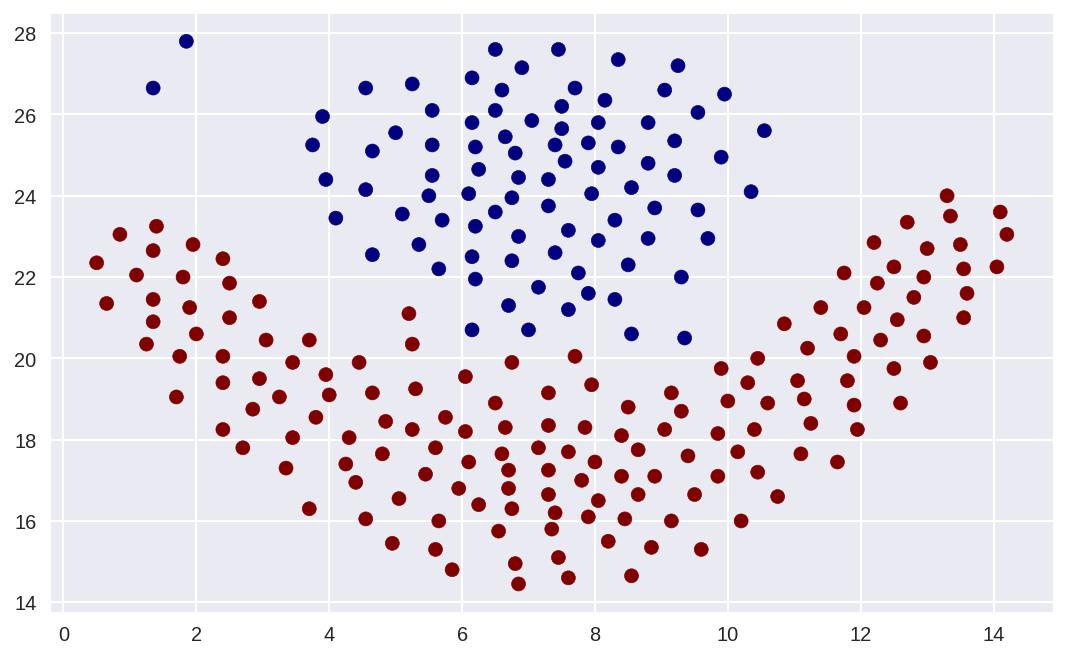

In [4]:
plotter(flame)

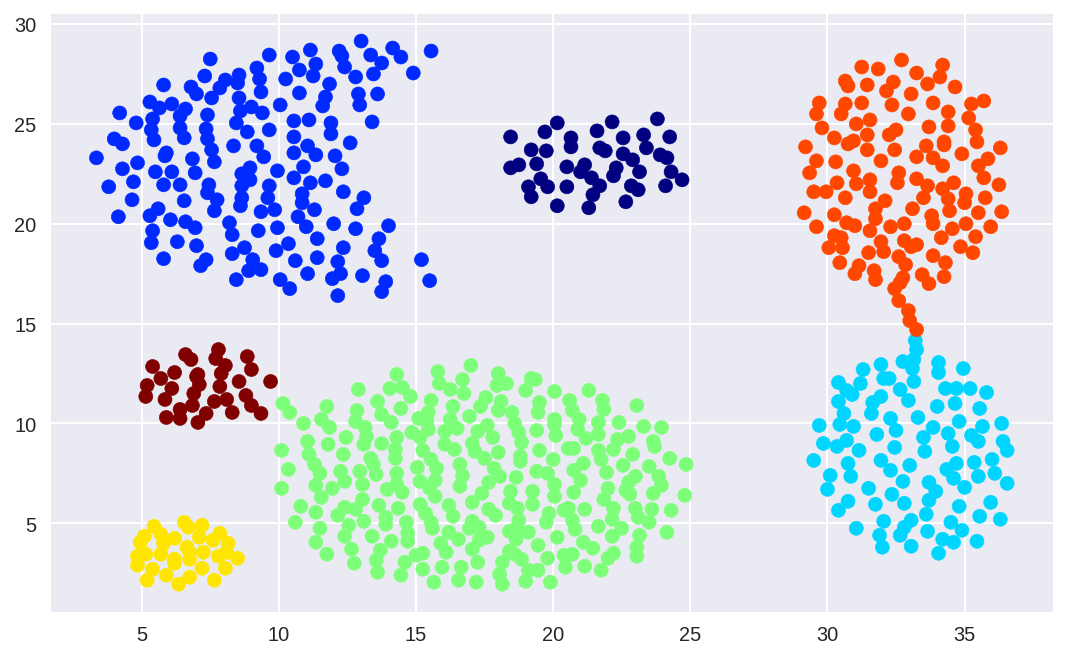

In [5]:
plotter(agg)

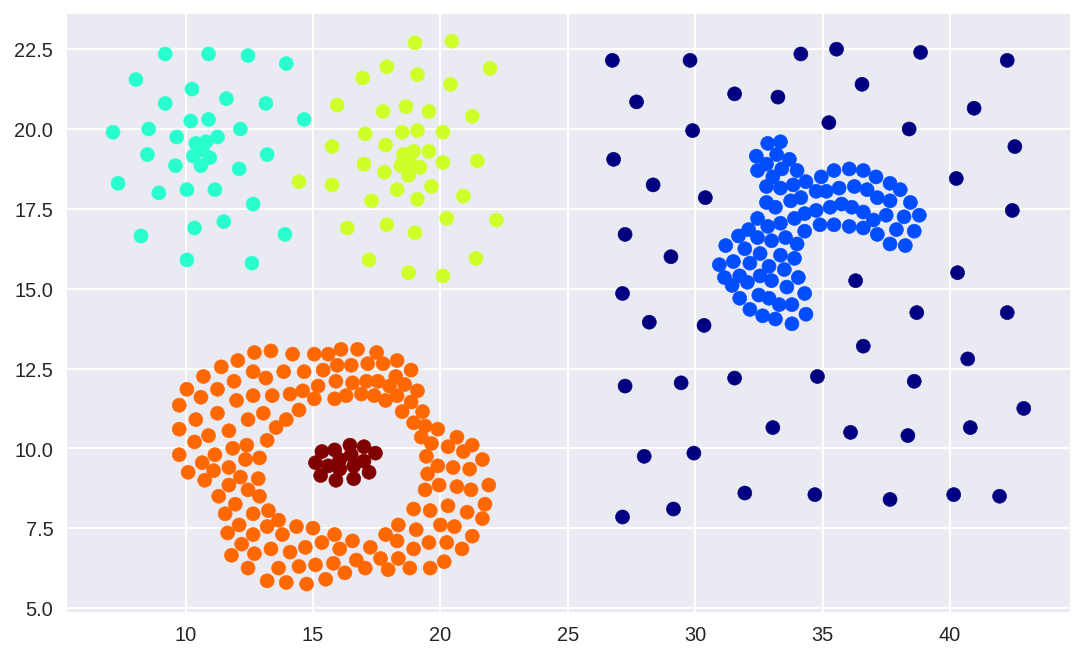

In [6]:
plotter(comp)

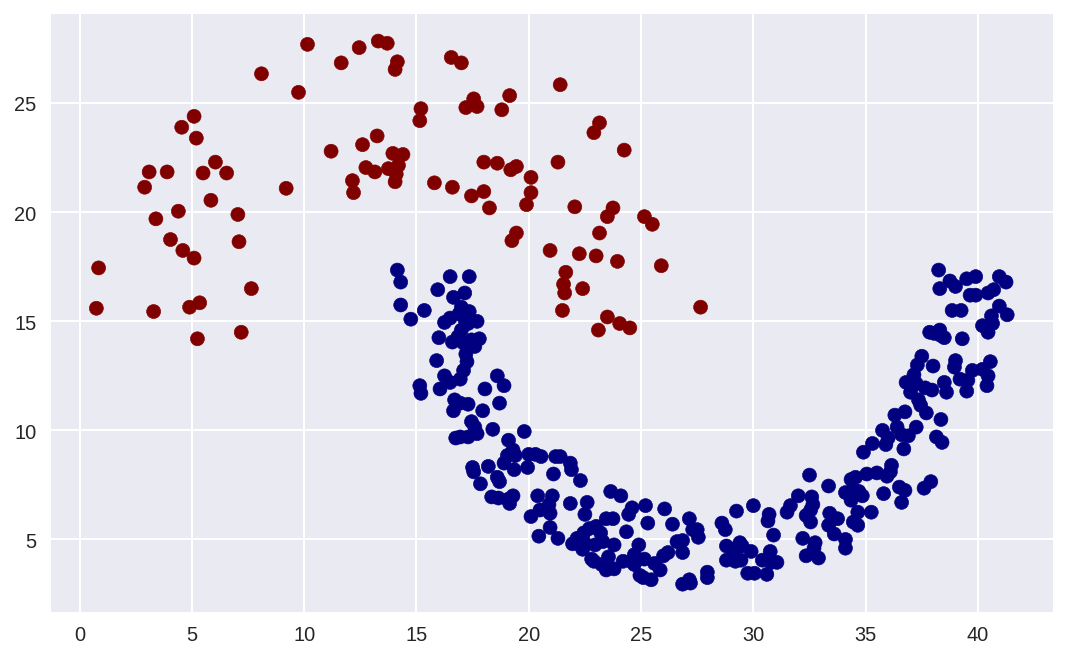

In [7]:
plotter(jain)

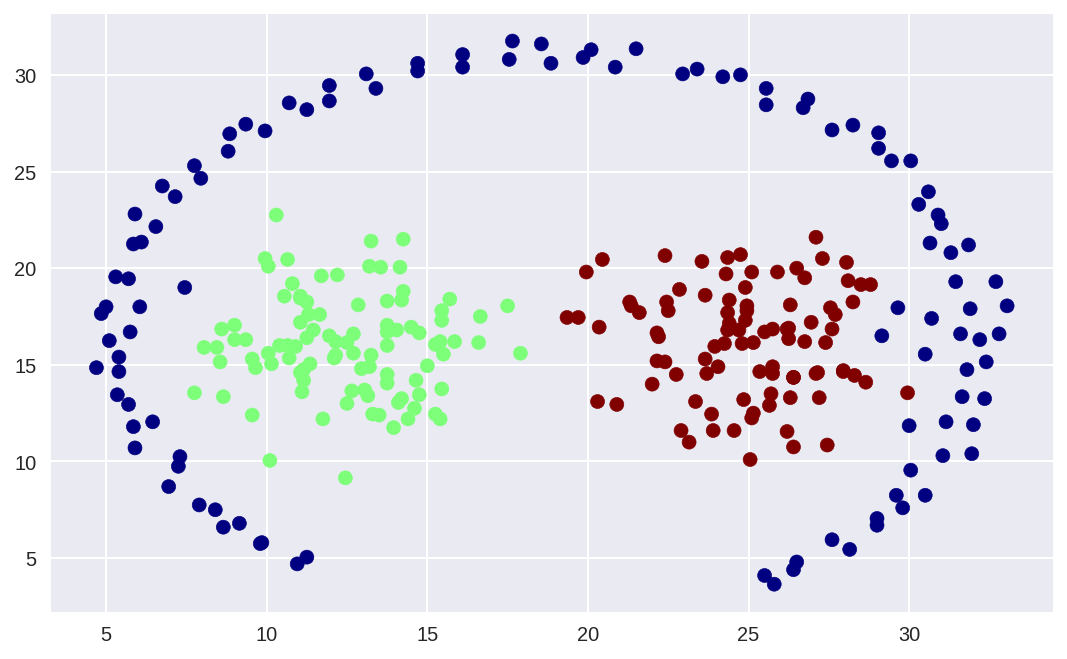

In [8]:
plotter(path)

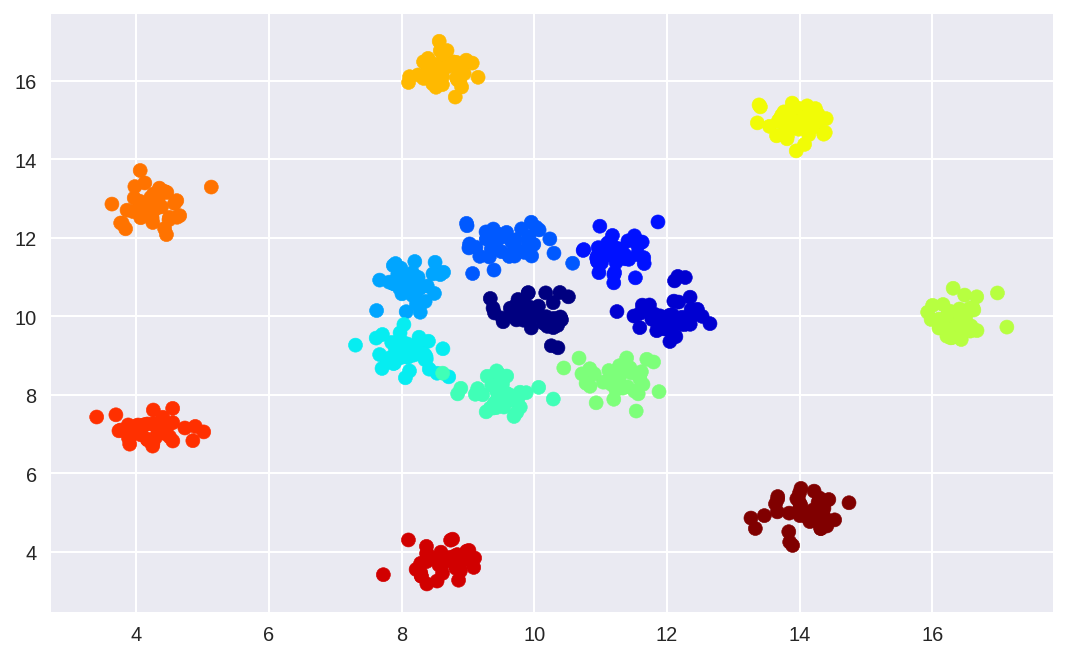

In [9]:
plotter(r15)

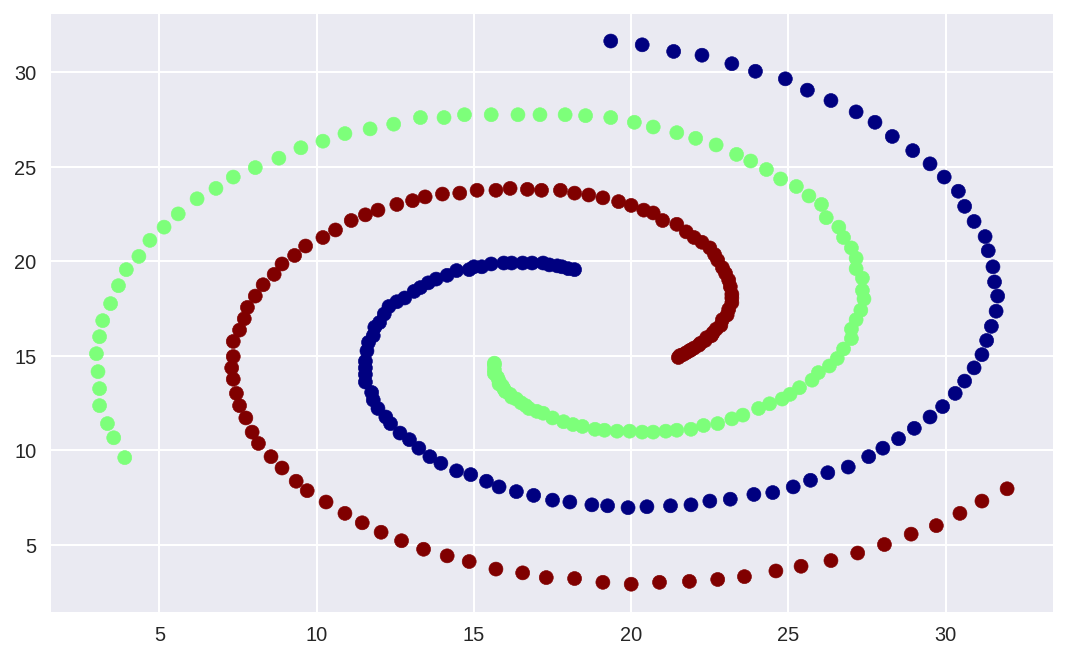

In [10]:
plotter(spiral)

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

In [12]:
def kmeans(X, ax=None, n_clusters=8):
    ss = StandardScaler()
    Xs = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    if ax:
        ax.scatter(Xs[:,0], Xs[:,1],c=y_pred, cmap='jet')
        ax.title.set_text("K-means")
    else:
        plt.scatter(Xs[:,0], Xs[:,1],c=y_pred, cmap='jet')
        plt.title("K-means")
    return km.labels_

def hierarchical(X, ax=None, n_clusters=2):
    ss = StandardScaler()
    Xs = ss.fit_transform(X)
    hi = AgglomerativeClustering(n_clusters=n_clusters)
    hi.fit(X)
    y_pred = hi.fit_predict(X)
    if ax:
        ax.scatter(Xs[:,0], Xs[:,1],c=y_pred, cmap='jet')
        ax.title.set_text("Hierarchical Tree")
    else:
        plt.scatter(Xs[:,0], Xs[:,1],c=y_pred, cmap='jet')
        plt.title("Hierarchical Tree")
    return hi.labels_

def db_scan(X, ax=None, eps=0.5, min_samples=5):
    ss = StandardScaler()
    Xs = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = db.fit_predict(X)
    if ax:
        ax.scatter(Xs[:,0], Xs[:,1],c=y_pred, cmap='jet')
        ax.title.set_text("DBSCAN")
    else:
        plt.scatter(Xs[:,0], Xs[:,1],c=y_pred, cmap='jet')
        plt.title("DBSCAN")
    return db.labels_

In [13]:
def do_all(dataset, n_clusters=8, n_clusters2=2, eps=0.5, min_samples=5):
    # Load data
    flame = pd.read_csv('./datasets/flame.csv')
    agg = pd.read_csv('./datasets/aggregation.csv')
    comp = pd.read_csv('./datasets/compound.csv')
    jain = pd.read_csv('./datasets/jain.csv')
    path = pd.read_csv('./datasets/pathbased.csv')
    r15 = pd.read_csv('./datasets/r15.csv')
    spiral = pd.read_csv('./datasets/spiral.csv')
    # Data dict
    datas = {'flame': flame, 'agg': agg, 'comp': comp, 'jain':jain, 'path': path,
            'r15': r15, 'spiral':spiral}
    
    # Asign data
    X = datas[dataset]
    X2 = X.ix[:,:2]
    # Create axis
    f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
    # Plot original
    ax1.scatter(X.ix[:,0], X.ix[:,1],c=X.ix[:,2], cmap='jet')
    ax1.title.set_text("Original data")
    km_lab = kmeans(X2, ax=ax2, n_clusters=n_clusters)
    hie_lab = hierarchical(X, ax=ax3, n_clusters=n_clusters2)
    db_lab = db_scan(X, ax=ax4, eps=min_samples, min_samples=min_samples)
    # Print info
    print "K-means number of clusters:", n_clusters
    print "Hierarchical Tree number of clusters:", n_clusters2
    print "DBSCAN: ", 'labels', len(list(set(db_lab))),'eps', eps, 'min_samples', min_samples

K-means number of clusters: 8
Hierarchical Tree number of clusters: 2
DBSCAN:  labels 1 eps 0.5 min_samples 5


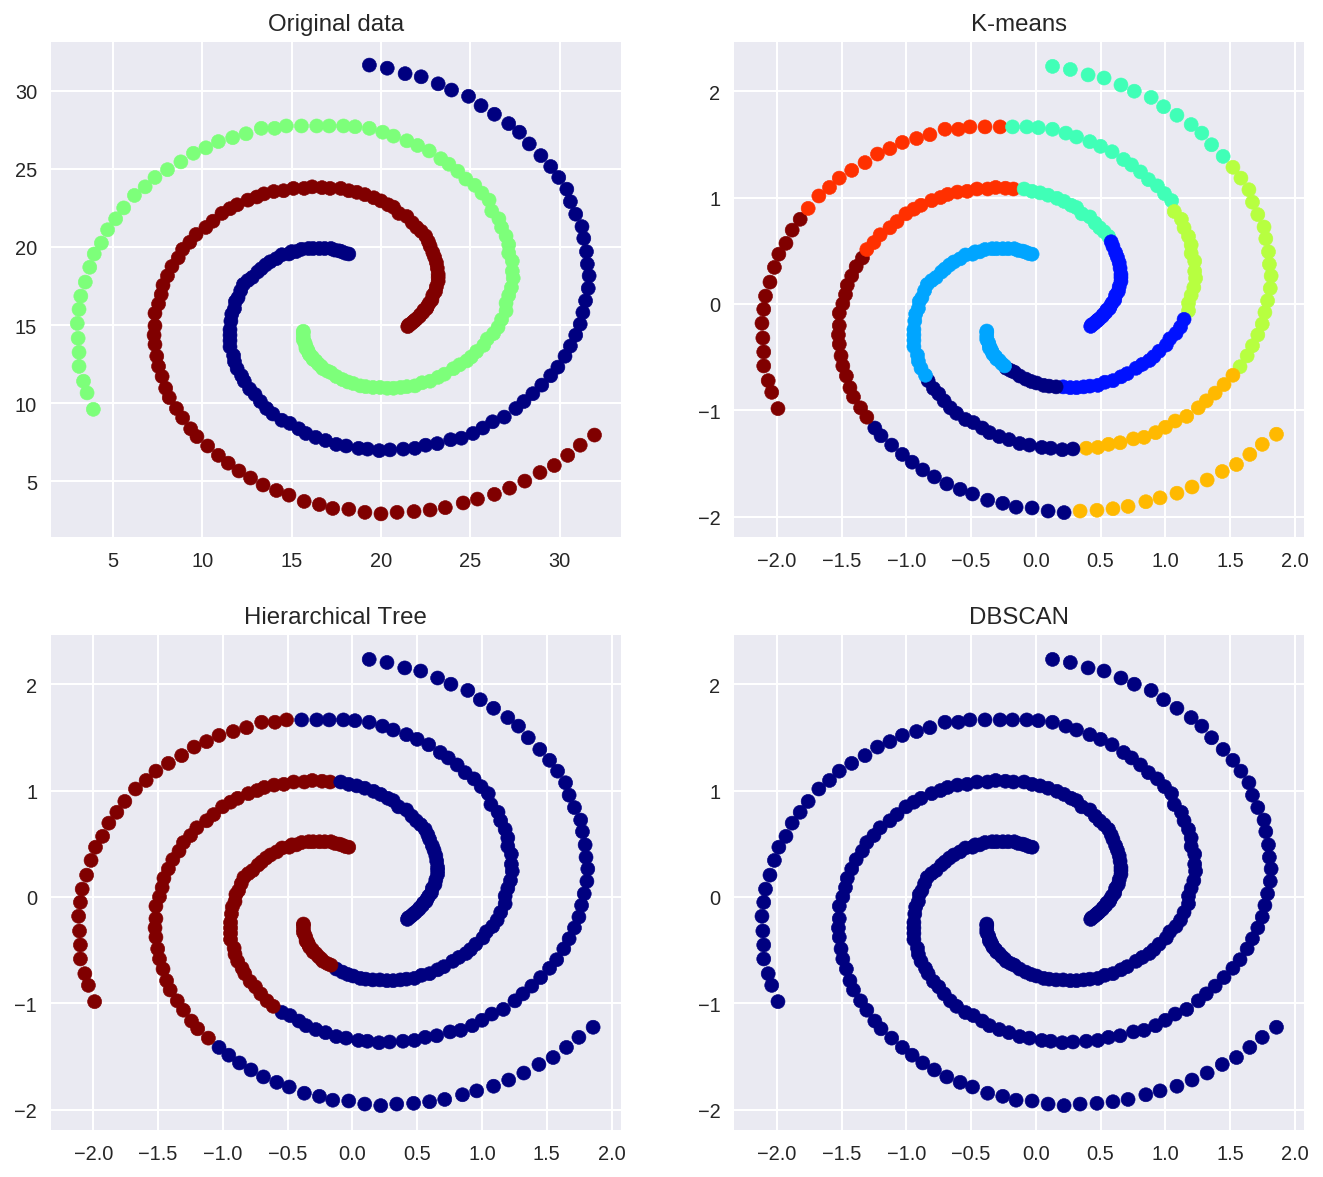

In [14]:
do_all('spiral')

In [15]:
from ipywidgets import *
from IPython.display import display

def do_all_(data='flame', n_clusters=8, n_clusters2=2, eps=0.5, min_samples=5):
    do_all(data, n_clusters, n_clusters2, eps, min_samples)

K-means number of clusters: 3
Hierarchical Tree number of clusters: 7
DBSCAN:  labels 1 eps 7.5 min_samples 7


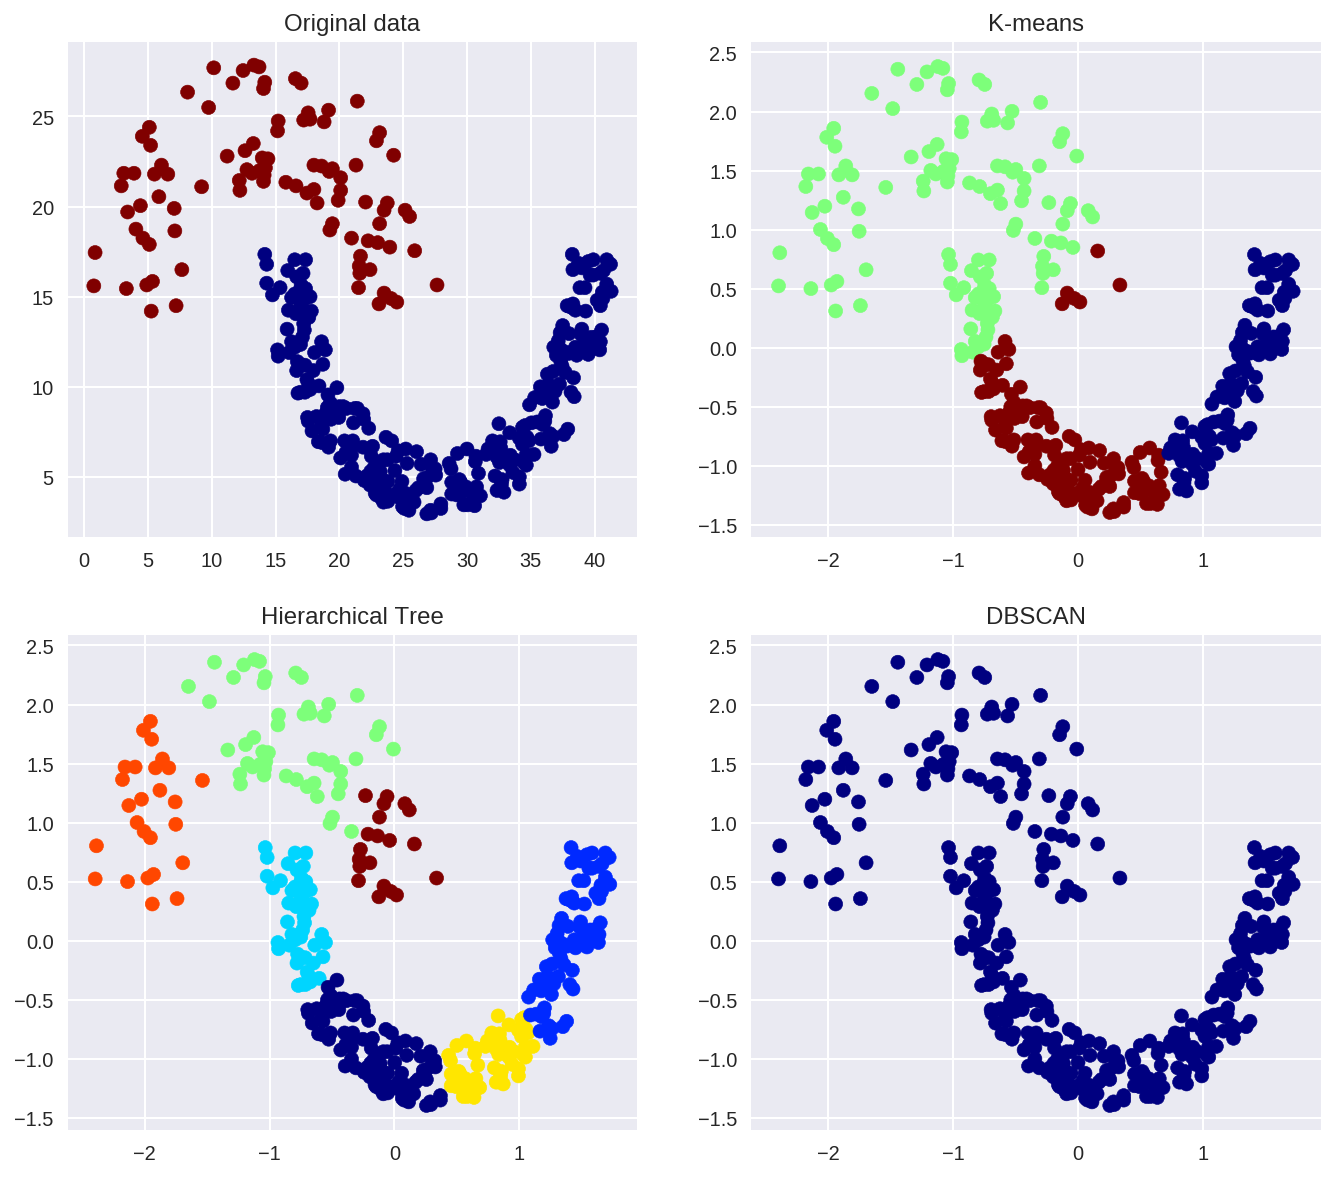

In [16]:
widgets.interact(do_all_, data = ('flame', 'agg', 'comp', 'jain', 'path', 'r15', 'spiral'),
                 n_clusters=widgets.IntText(
                 value=7,
                 description='K-means n_clusters:',
                 disabled=False
                 ),
                 n_clusters2=widgets.IntText(
                 value=7,
                 description='Hierarchical n_clusters:',
                 disabled=False
                 ),
                 eps=widgets.FloatText(
                 value=7.5,
                 description='DBSCAN Epsilon:',
                 disabled=False,
                 color='black'
                 ),
                 min_samples=widgets.IntText(
                 value=7,
                 description='DBSCAN Min Samples:',
                 disabled=False
                 ))
